# Classifier using MNIST dataset and Keras

In [1]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K

import matplotlib.pyplot as plt
import numpy as np

In [3]:
print("[INFO] accessing MNIST...")
((trainX, trainY),(testX, testY)) = mnist.load_data()

# Flattening the image 
trainX = trainX.reshape((trainX.shape[0],28*28*1))
testX = testX.reshape((testX.shape[0],28*28*1))

trainX = trainX.astype('float32')/255.0
testX = testX.astype('float32')/255.0

[INFO] accessing MNIST...


In [4]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [7]:
# Defining the 784-256-128-10 architecture using Keras
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation = 'sigmoid'))
model.add(Dense(128, activation = 'sigmoid'))
model.add(Dense(10, activation = 'softmax'))

In [9]:
# train the model using SGD
sgd = SGD(0.01)
model.compile(loss  = 'categorical_crossentropy', optimizer = sgd,
              metrics = ['accuracy'])
H = model.fit(trainX, trainY, validation_data = (testX, testY), 
              epochs=100, batch_size = 128)

Epoch 1/100
469/469 [==============================] - 4s 8ms/step - loss: 2.2132 - accuracy: 0.3770 - val_loss: 2.1731 - val_accuracy: 0.4425
Epoch 2/100
469/469 [==============================] - 3s 7ms/step - loss: 2.1288 - accuracy: 0.4988 - val_loss: 2.0716 - val_accuracy: 0.5629
Epoch 3/100
469/469 [==============================] - 3s 7ms/step - loss: 2.0087 - accuracy: 0.5726 - val_loss: 1.9265 - val_accuracy: 0.6366
Epoch 4/100
469/469 [==============================] - 3s 7ms/step - loss: 1.8416 - accuracy: 0.6262 - val_loss: 1.7338 - val_accuracy: 0.6558
Epoch 5/100
469/469 [==============================] - 3s 7ms/step - loss: 1.6355 - accuracy: 0.6712 - val_loss: 1.5156 - val_accuracy: 0.6908
Epoch 6/100
469/469 [==============================] - 3s 7ms/step - loss: 1.4210 - accuracy: 0.7126 - val_loss: 1.3070 - val_accuracy: 0.7312
Epoch 7/100
469/469 [==============================] - 3s 7ms/step - loss: 1.2294 - accuracy: 0.7470 - val_loss: 1.1328 - val_accuracy: 0.7714

In [19]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size = 128)
print(classification_report(testY.argmax(axis = 1),
      predictions.argmax(axis = 1),
      target_names  = [str(x) for x in lb.classes_]))

[INFO] evaluating network...
79/79 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.97      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.91      0.91      0.91      1010
           4       0.91      0.94      0.92       982
           5       0.89      0.88      0.89       892
           6       0.93      0.95      0.94       958
           7       0.93      0.93      0.93      1028
           8       0.89      0.89      0.89       974
           9       0.93      0.89      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



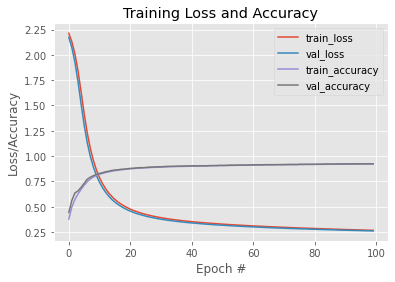

In [23]:
plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(0,100), H.history['loss'], label='train_loss')
plt.plot(np.arange(0,100), H.history['val_loss'], label='val_loss')
plt.plot(np.arange(0,100), H.history['accuracy'], label='train_accuracy')
plt.plot(np.arange(0,100), H.history['val_accuracy'], label='val_accuracy')

plt.title("Training Loss and Accuracy")
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()